In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


# Data Science Salaries EDA & Predection

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_squared_error

# **Data Imporing**

In [3]:
df = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv', index_col = 0)

# About Dataset 
**work_year** -	The year the salary was paid.

**experience_level** - The experience level in the job during the year with the following possible values:    
                        EN = Entry-level / Junior     
                        MI = Mid-level / Intermediate     
                        SE = Senior-level / Expert     
                        EX = Executive-level / Director
                        
**employment_type** - The type of employement for the role:     
                      PT = Part-time     
                      FT = Full-time      
                      CT = Contract      
                      FL = Freelance     
                    
**job_title** -	The role worked in during the year.

**salary**	- The total gross salary amount paid.

**salary_currency** - The currency of the salary paid as an [ISO 4217](https://en.wikipedia.org/wiki/ISO_4217) [currency code](https://en.wikipedia.org/wiki/ISO_4217#Active_codes).

**salary_in_usd** - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

**employee_residence** - Employee's primary country of residence in during the work year as an [ISO 3166 country code](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes#Current_ISO_3166_country_codes)(Alpha-2 code).

**remote_ratio** - The overall amount of work done remotely, possible values are as follows:      
                   0   = No remote work (less than 20%)      
                   50  = Partially remote      
                   100 = Fully remote (more than 80%)     
                    
**company_location** - The country of the employer's main office or contracting branch as an [ISO 3166 country code](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes#Current_ISO_3166_country_codes)(Alpha-2 code).

**company_size** - The average number of people that worked for the company during the year:      
                   S = less than 50 employees (small)      
                   M = 50 to 250 employees (medium)      
                   L = more than 250 employees (large)     

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


# Data Wrangling/Munging

In [6]:
df.shape

(607, 11)

In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


**Finding the Missing values from Data**

In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
for col in df.columns:
    print("Total Number of Variables in the column\n", df[col].value_counts())

Total Number of Variables in the column
 2022    318
2021    217
2020     72
Name: work_year, dtype: int64
Total Number of Variables in the column
 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
Total Number of Variables in the column
 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
Total Number of Variables in the column
 Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                 


# **Unilateral Elements**

We are Checking the Pattern of the unilateral elements


In [11]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='work_year', ylabel='Density'>

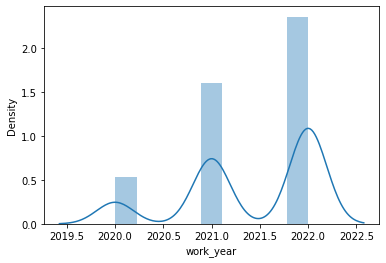

In [12]:
sns.distplot(df['work_year'])

In [13]:
k = df['experience_level'].value_counts()

In [14]:
k.to_frame().reset_index()

,index,experience_level
0,SE,280
1,MI,213
2,EN,88
3,EX,26


In [15]:
df['salary'].value_counts()

100000     18
80000      18
120000     15
60000      15
150000     14
           ..
256000      1
39600       1
1335000     1
52500       1
129000      1
Name: salary, Length: 272, dtype: int64

<AxesSubplot:ylabel='salary_in_usd'>

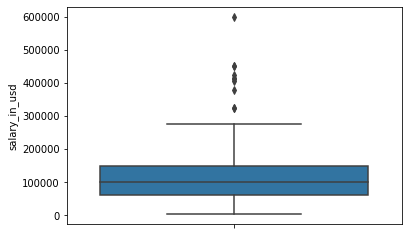

In [16]:
sns.boxplot(y="salary_in_usd", data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

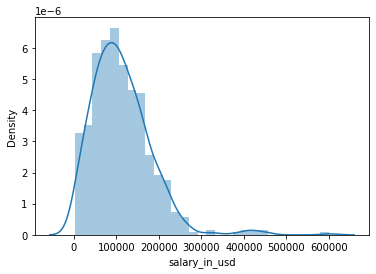

In [17]:
sns.distplot(df['salary_in_usd'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='remote_ratio', ylabel='Density'>

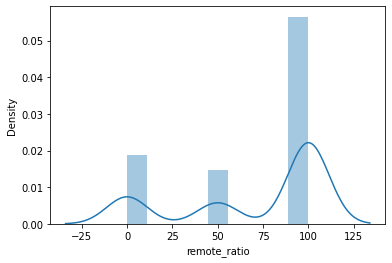

In [18]:
sns.distplot(df['remote_ratio'])

# **Bilateral and Multilateral Elements**
We are Observing the patten of the different Bilateral and Multilateral Element and their relations

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

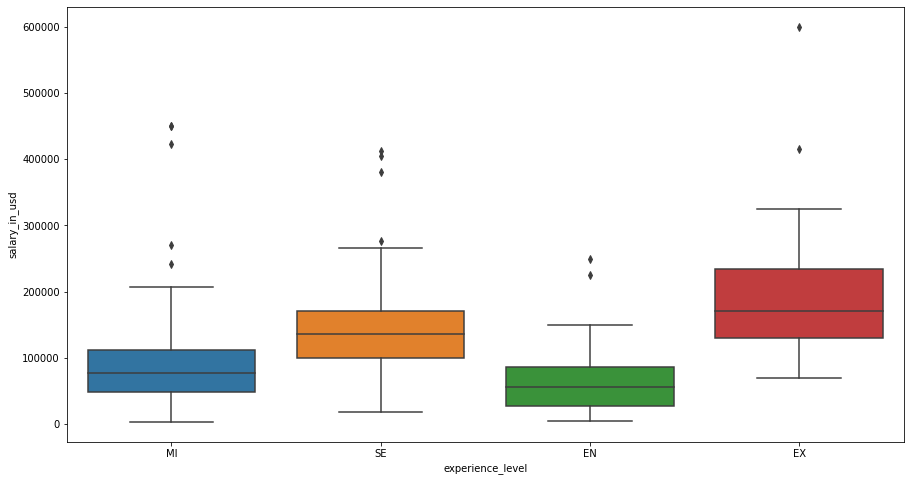

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

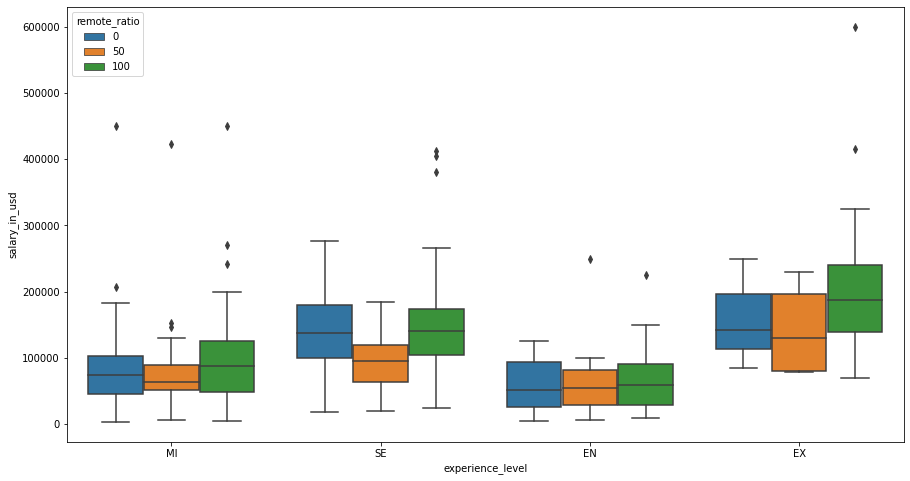

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x="experience_level", y="salary_in_usd",hue='remote_ratio', data=df)

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

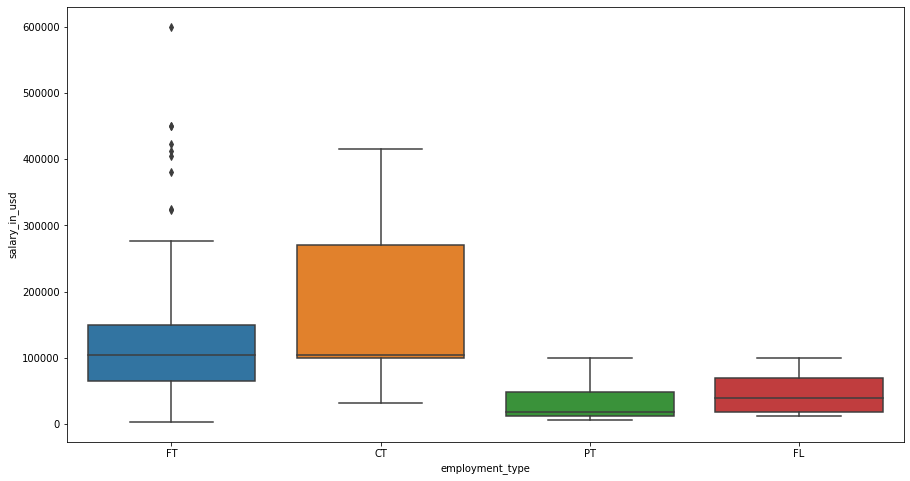

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x="employment_type", y="salary_in_usd", data=df)

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

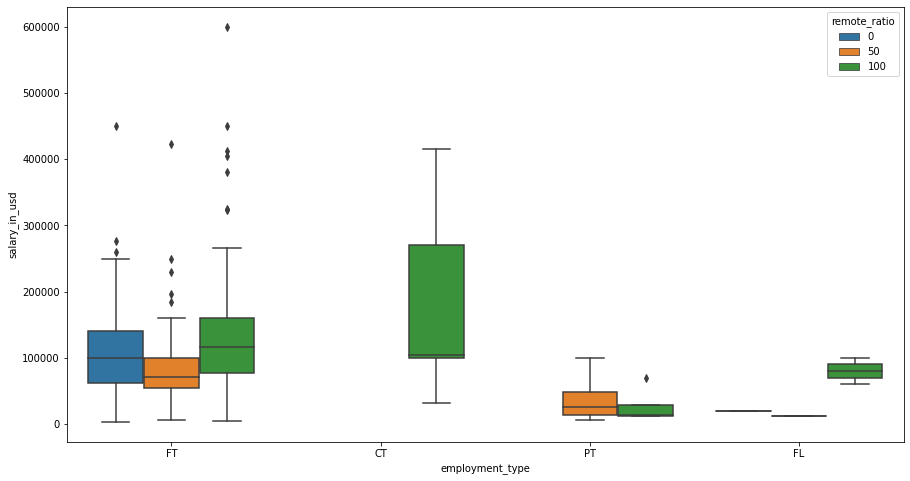

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x="employment_type", y="salary_in_usd",hue = "remote_ratio", data=df)

We are observing top 10 Jobs in the list

In [23]:
first_10_job_titles =  df['job_title'].value_counts()[:10].keys()
df_filtered_job_titles = df[df['job_title'].isin(first_10_job_titles)]
df_filtered_job_titles['job_title'].value_counts()

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Principal Data Scientist        7
Name: job_title, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(job_title, 0, 'Data Scientist'),
  Text(job_title, 0, 'Machine Learning Scientist'),
  Text(job_title, 0, 'Big Data Engineer'),
  Text(job_title, 0, 'Machine Learning Engineer'),
  Text(job_title, 0, 'Data Analyst'),
  Text(job_title, 0, 'Data Engineer'),
  Text(job_title, 0, 'Research Scientist'),
  Text(job_title, 0, 'Principal Data Scientist'),
  Text(job_title, 0, 'Data Science Manager'),
  Text(job_title, 0, 'Data Architect')])

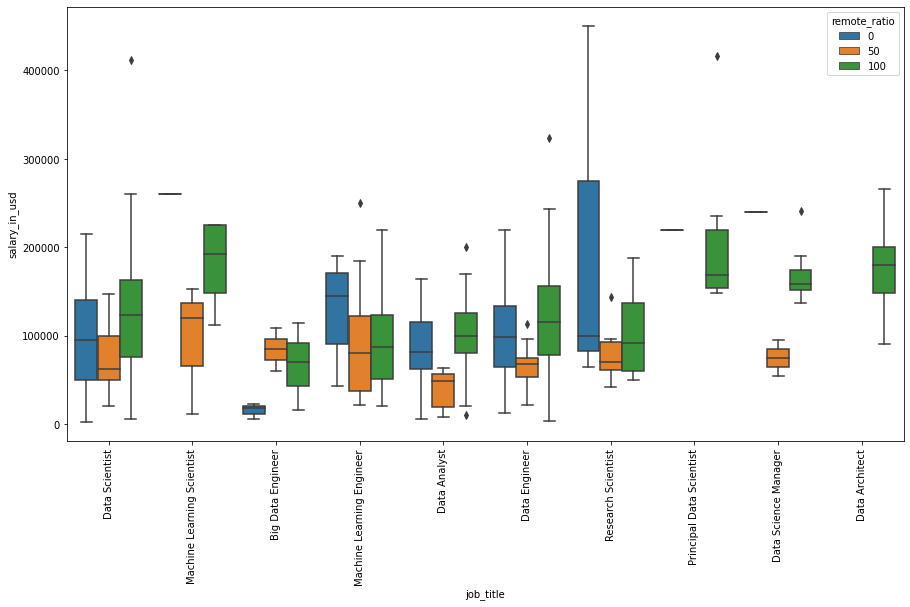

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x="job_title", y="salary_in_usd",hue = "remote_ratio" , data=df_filtered_job_titles)
plt.xticks(x ="job_title" ,rotation ='vertical')

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

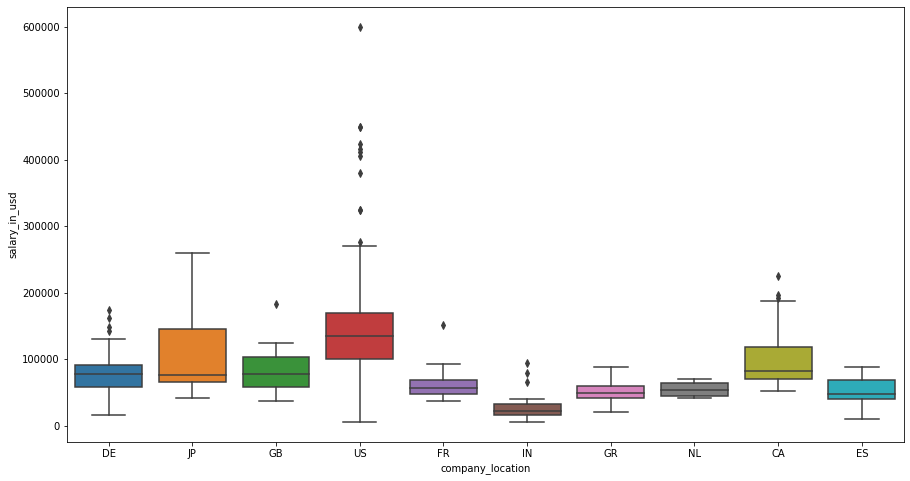

In [25]:
first_10_company_location =  df['company_location'].value_counts()[:10].keys()
df_filtered_company_location = df[df['company_location'].isin(first_10_company_location)]

plt.figure(figsize=(15,8))
sns.boxplot(x="company_location", y="salary_in_usd", data=df_filtered_company_location)

In [26]:
import plotly.express as px
import seaborn as sns
import os
px.scatter(df, x=df.employee_residence.sort_values(), y = df.company_location.sort_values(), color = 'remote_ratio' ,
           labels ={"x":'Employee Residence', "y":'Company Location', "remote_ratio":'Work Type', 'salary_in_usd':'Salary(USD)'}, 
           title = 'Company Location VS Employee Residence for type of work(Remote, Hybrid or On-site)')

In [27]:
px.bar(df, x=df.job_title.sort_values(), color = 'experience_level', height = 800, barmode = 'group',
      title = 'Count of number of people with all experience levels in each job')

In [28]:
px.scatter(df, x = 'salary_in_usd', y = 'experience_level', size = 'salary_in_usd', hover_name = 'job_title', color = 'job_title', 
           animation_frame = 'work_year', title = 'Experience level VS Salary')

<Figure size 1080x576 with 0 Axes>

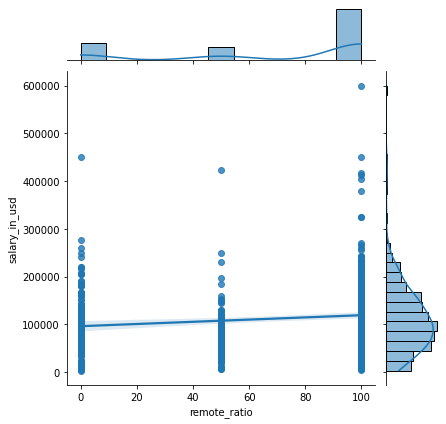

In [29]:
plt.figure(figsize=(15,8))
sns.jointplot(x="remote_ratio", y="salary_in_usd", data=df, kind="reg")

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

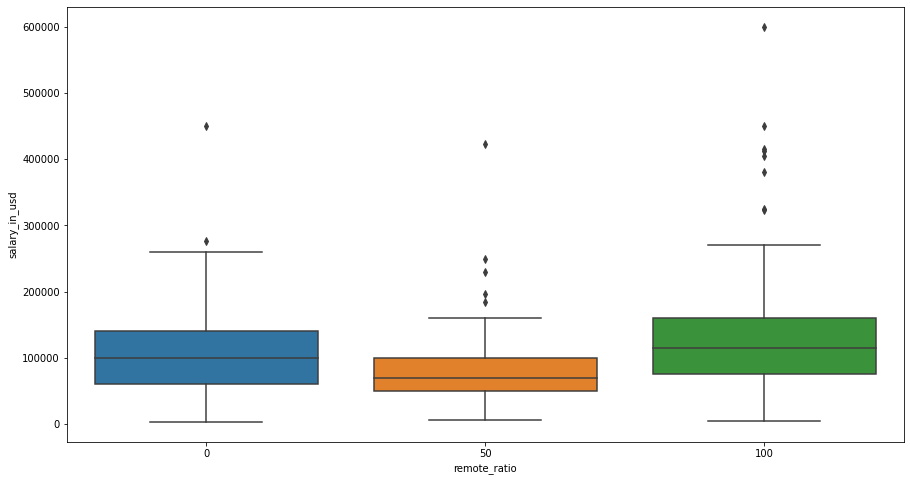

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(x="remote_ratio", y="salary_in_usd", data=df)

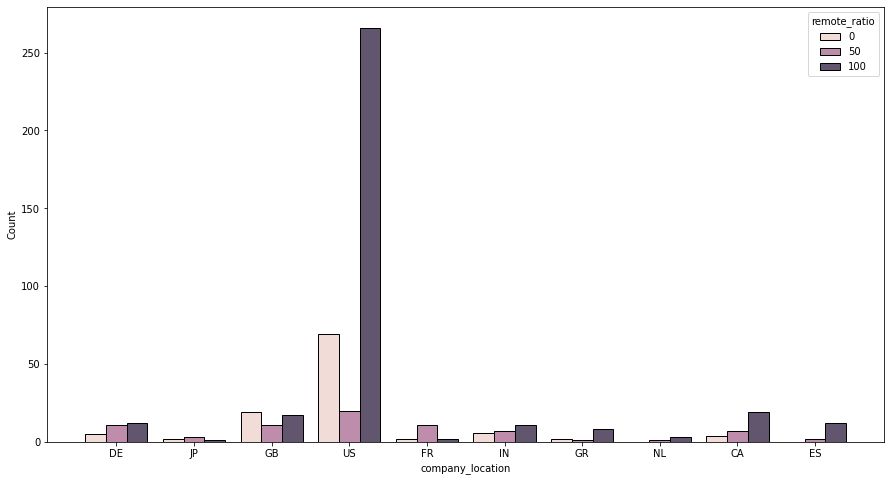

In [31]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="company_location", hue="remote_ratio", data=df_filtered_company_location ,multiple="dodge", shrink=.8)

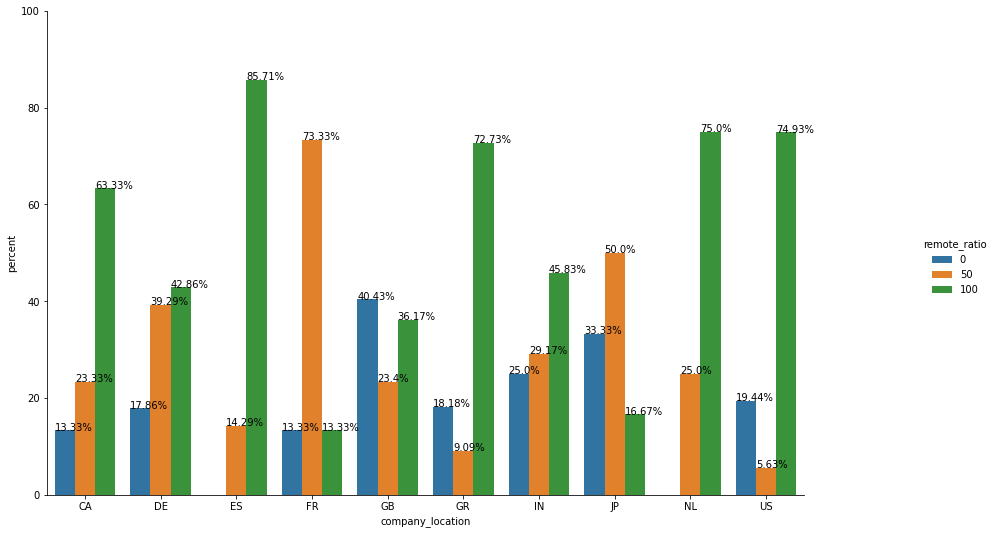

In [32]:
x,y = 'company_location', 'remote_ratio'

g = (df_filtered_company_location
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
g.fig.set_size_inches(15,8)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [33]:
from sklearn.preprocessing import OneHotEncoder
def category_to_column(df, column, prefix=''):
    df_copy = df.copy()
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df_copy[[column]])
    name_columns = prefix + oe_style.categories_[0]
    temp = pd.DataFrame(oe_results.toarray(), columns=name_columns, index=df_copy.index)
    df_copy = pd.concat([df_copy, temp], axis=1)
    return df_copy

In [34]:
columns_category = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
df_v2 = df.copy()
for column in columns_category:
    df_v2 = category_to_column(df_v2, column)
df_v2 = df_v2.drop(columns=columns_category)
df_v2.head()

,work_year,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,EN,EX,MI,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,2020,Data Scientist,70000,79833,DE,0,DE,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,Machine Learning Scientist,260000,260000,JP,0,JP,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020,Big Data Engineer,85000,109024,GB,50,GB,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,Product Data Analyst,20000,20000,HN,0,HN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2020,Machine Learning Engineer,150000,150000,US,50,US,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [35]:
df_v3 = df_v2.drop(columns=['job_title', 'salary', 'employee_residence', 'company_location'])
df_v3.head()

,work_year,salary_in_usd,remote_ratio,EN,EX,MI,SE,CT,FL,FT,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,2020,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2020,150000,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<AxesSubplot:>

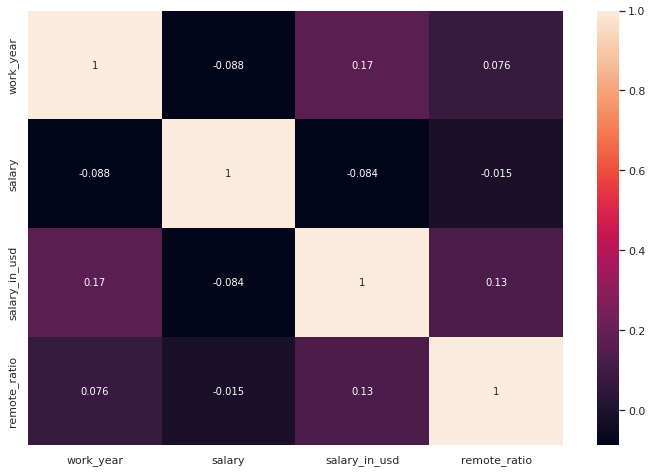

In [36]:
corr = df.corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

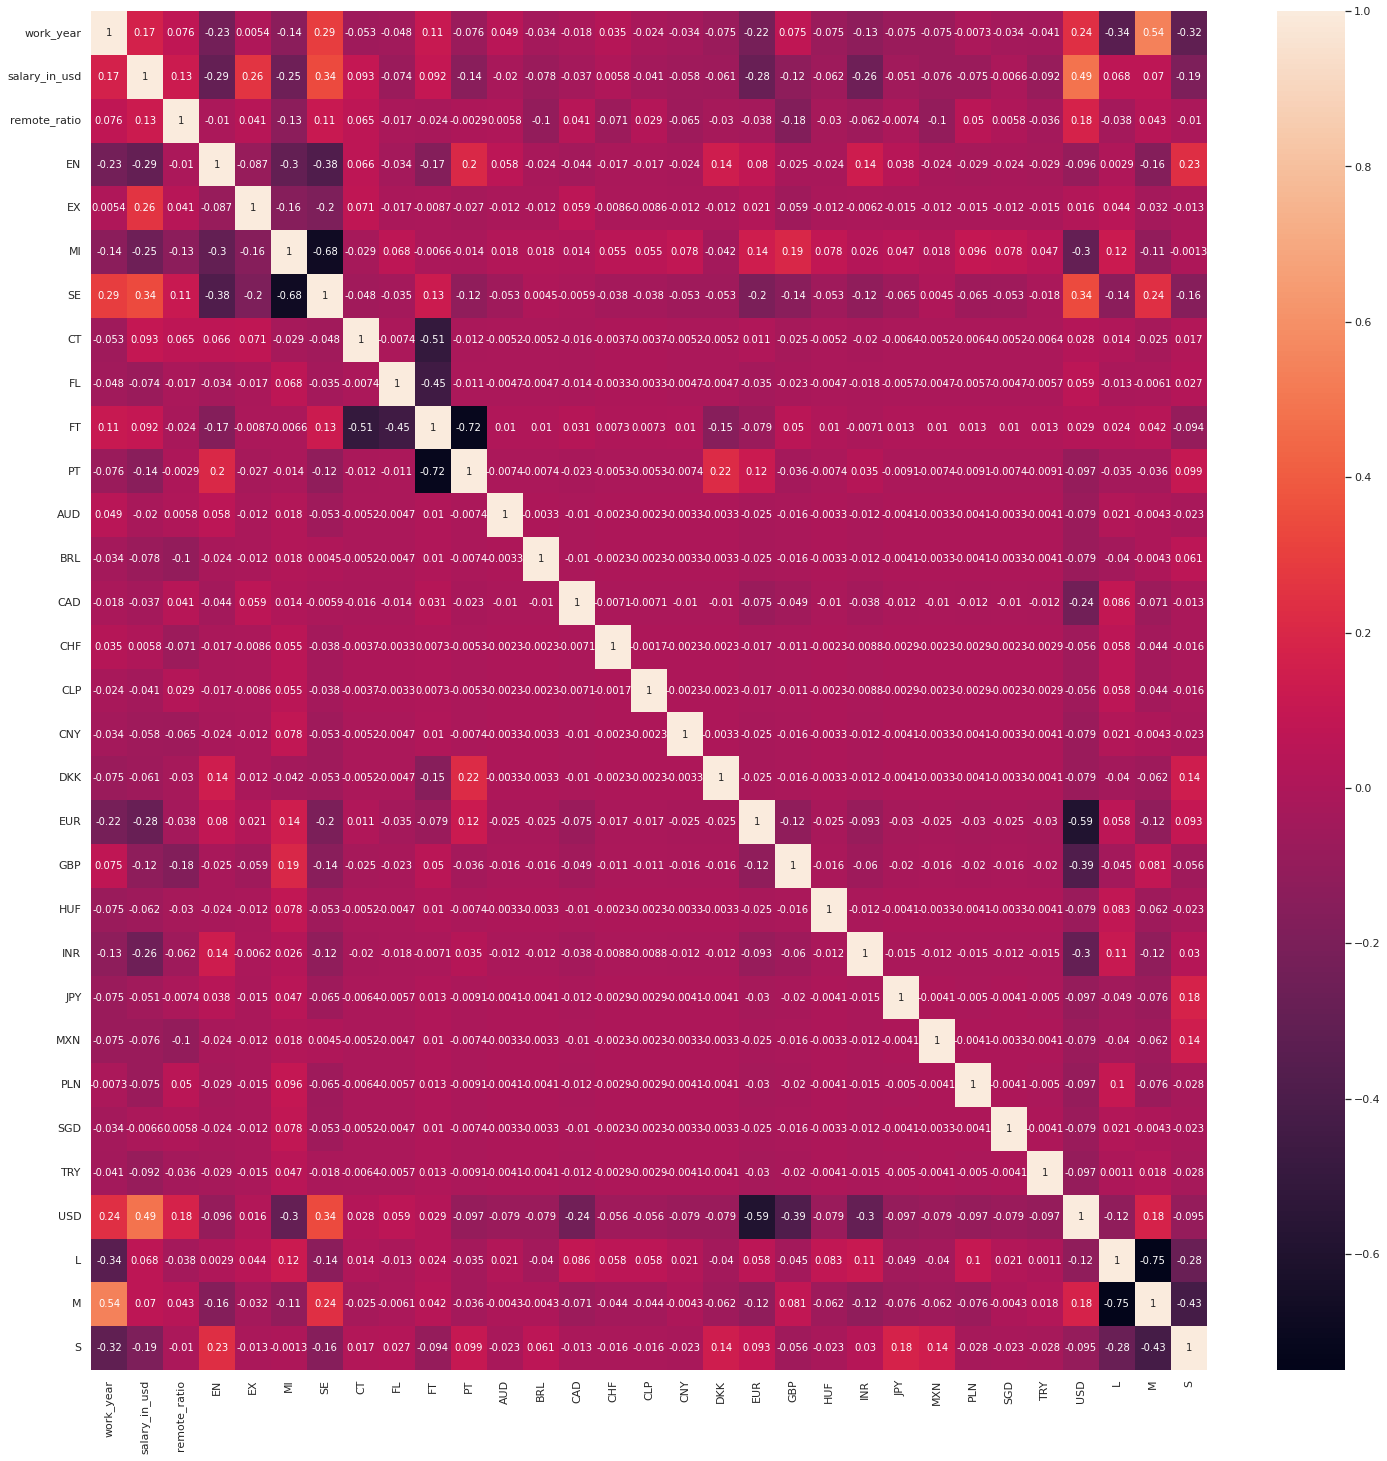

In [37]:
corr = df_v3.corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

# Standadization

In [38]:
from sklearn.preprocessing import StandardScaler

feature = df_v3.drop(columns=['salary_in_usd'])
target = df_v3['salary_in_usd']

scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = scaler.transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, columns=feature.columns, index=feature.index)
feature_scaled.head()

,work_year,remote_ratio,EN,EX,MI,SE,CT,FL,FT,PT,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,-2.032024,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,-1.379966,1.437239,-1.077099,-0.397991
1,-2.032024,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,-0.695778,-1.077099,2.512619
2,-2.032024,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,-1.379966,-0.695778,0.928420,-0.397991
3,-2.032024,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,-0.695778,-1.077099,2.512619
4,-2.032024,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,1.437239,-1.077099,-0.397991


In [39]:
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))
target_scaled[0:10]

array([[-0.45790445],
       [ 2.08328151],
       [-0.04617667],
       [-1.30182581],
       [ 0.53177399],
       [-0.56838589],
       [ 1.09595854],
       [-1.07988971],
       [ 0.32020478],
       [ 0.17915864]])

# Train-Test Spliting

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled , target_scaled, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Model Preparation

**Logistic_Regression**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

0.3847537059155601

In [42]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.38325981011167937

In [43]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

1.0406870544352442

In [44]:
from sklearn import linear_model
model = linear_model.ARDRegression()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.3838557207377031

In [45]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='linear', input_dim=X_train.shape[1]),
     keras.layers.Dense(256 ,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    keras.layers.Dense(1,  kernel_initializer='random_uniform', activation='linear', use_bias=False)
  ])
model.compile(loss='mean_squared_error', optimizer='adam')
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

2022-06-21 11:01:22.067254: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-21 11:01:22.250180: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.9817 - val_loss: 0.4964
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7119 - val_loss: 0.3760
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6387 - val_loss: 0.3857
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6176 - val_loss: 0.3743
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6159 - val_loss: 0.4235
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.3961
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6190 - val_loss: 0.4075
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6093 - val_loss: 0.3689
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6202 - val_loss: 0.3841
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6175 - val_loss: 0.3898
Epoch 11

Text(0, 0.5, 'Cost')

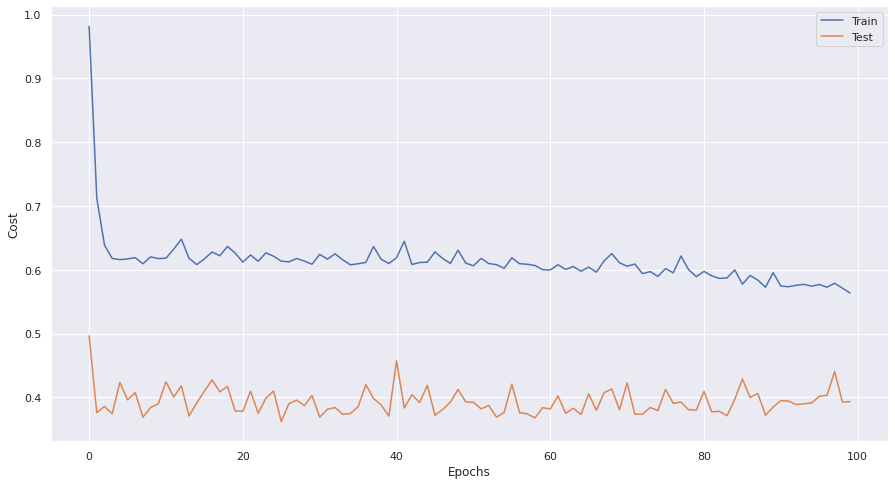

In [46]:
plt.figure(figsize=(15,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Cost')